In [1]:
import csv
from collections import Counter
from lsst.dax.apdb.pixelization import Pixelization
from lsst import sphgeom

import matplotlib.pyplot as plt
import numpy as np


In [2]:
pixelator = Pixelization("mq3c", 11, 64).pixelator

In [3]:
object_counts = Counter()
with open("diaobjectlast-partitions-count.dat", newline="") as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        object_counts[int(line[0])] = int(line[1])

In [4]:
source_counts = Counter()
with open("diasource-partitions-count.dat", newline="") as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        part = line[0].split("|")[0]
        source_counts[int(part)] = int(line[1])

In [5]:
def fill_arrays(counts, limit=-1):
    ras = []
    decs = []
    count_arr = []
    for i, (pix, count) in enumerate(counts.items()):
        if limit > 0 and i == limit:
            break
        p = pixelator.pixel(pix)
        v = sphgeom.Vector3d(p.getCentroid())
        lonlat = sphgeom.LonLat(v)
        ra, dec = lonlat.getLon().asRadians(), np.pi/2. + lonlat.getLat().asRadians()
        ras.append(ra)
        decs.append(dec)
        count_arr.append(count)
    max_count = max(count_arr)
    count_arr = [(c / max_count) * 1. for c in count_arr]
    return ras, decs, count_arr

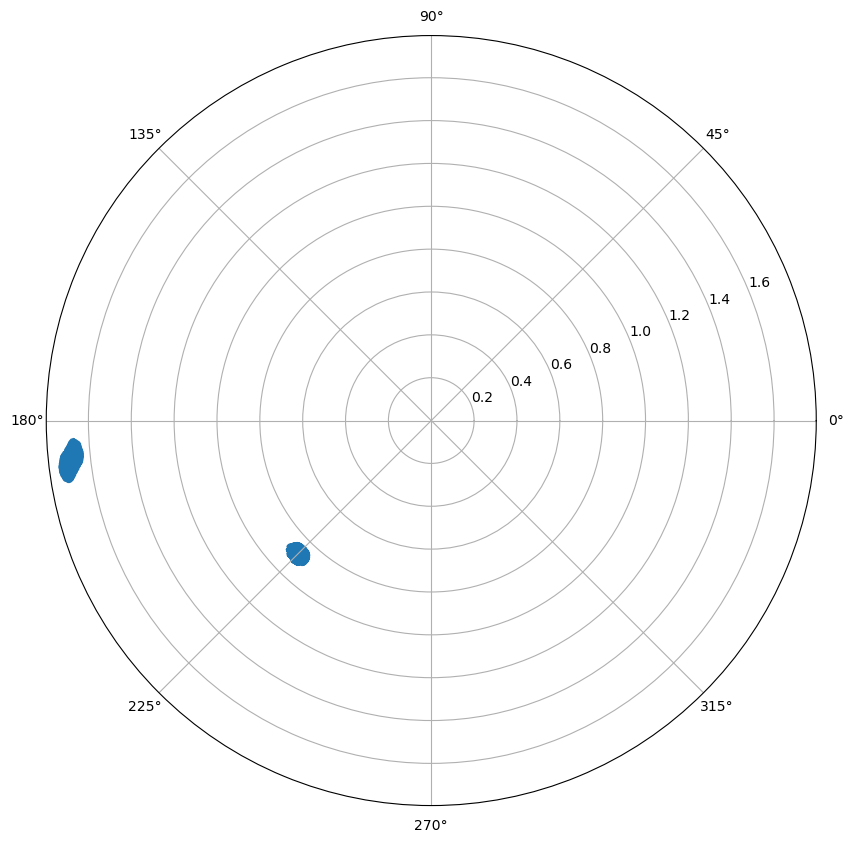

In [8]:
ras, decs, count_arr = fill_arrays(object_counts, 100000)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))
ax.set_rmax(110)
ax.scatter(ras, decs, count_arr);

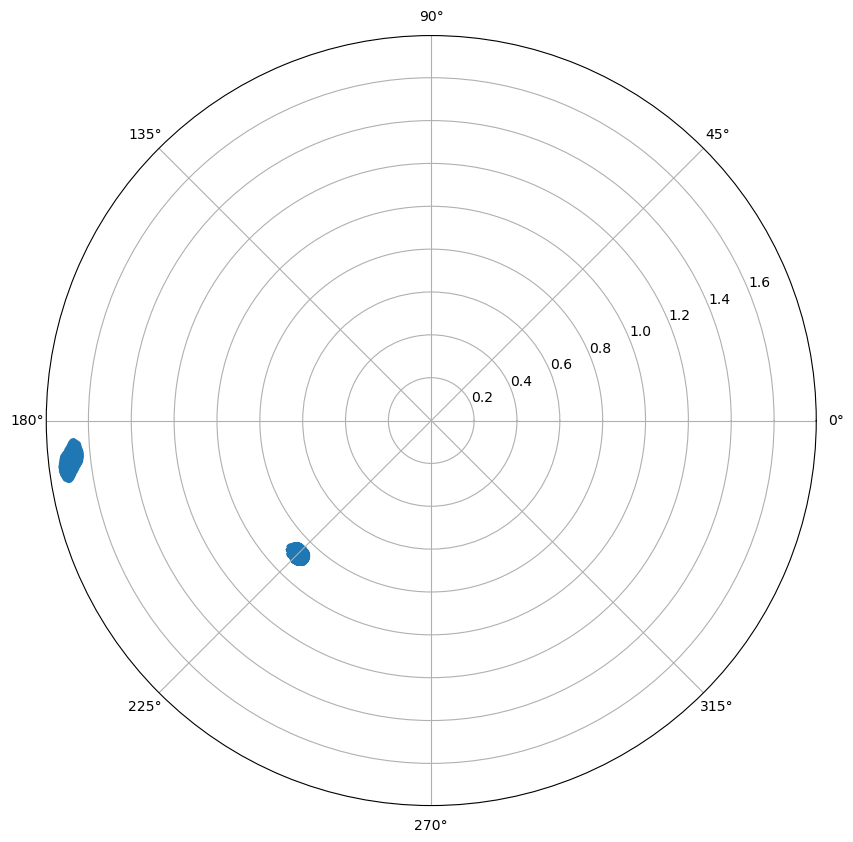

In [9]:
ras, decs, count_arr = fill_arrays(source_counts, 1000000)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))
ax.set_rmax(110)
ax.scatter(ras, decs, count_arr);